<a href="https://colab.research.google.com/github/ankitg-02/customer-purchase-and-transactional-behavoiur-analysis/blob/main/CPTBA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

**For Transaction Data**

In [2]:
data = pd.read_csv(r'/content/QVI_transaction_data.csv')
transaction=pd.DataFrame(data)
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,17-10-2018,1,1000,1,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0
1,14-05-2019,1,1307,348,66.0,CCs Nacho Cheese 175g,3.0,6.3
2,20-05-2019,1,1343,383,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9
3,17-08-2018,2,2373,974,69.0,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0
4,18-08-2018,2,2426,1038,108.0,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8


In [3]:
transaction.shape

(29028, 8)

In [4]:
transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          1
PROD_NAME         1
PROD_QTY          1
TOT_SALES         1
dtype: int64

In [5]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29028 entries, 0 to 29027
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            29028 non-null  object 
 1   STORE_NBR       29028 non-null  int64  
 2   LYLTY_CARD_NBR  29028 non-null  int64  
 3   TXN_ID          29028 non-null  int64  
 4   PROD_NBR        29027 non-null  float64
 5   PROD_NAME       29027 non-null  object 
 6   PROD_QTY        29027 non-null  float64
 7   TOT_SALES       29027 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.8+ MB


In [6]:
transaction['DATE']=pd.to_datetime(transaction['DATE'])

<ipython-input-6-847919e0e053>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  transaction['DATE']=pd.to_datetime(transaction['DATE'])


In [7]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29028 entries, 0 to 29027
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            29028 non-null  datetime64[ns]
 1   STORE_NBR       29028 non-null  int64         
 2   LYLTY_CARD_NBR  29028 non-null  int64         
 3   TXN_ID          29028 non-null  int64         
 4   PROD_NBR        29027 non-null  float64       
 5   PROD_NAME       29027 non-null  object        
 6   PROD_QTY        29027 non-null  float64       
 7   TOT_SALES       29027 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 1.8+ MB


In [8]:
for i in transaction.columns:
  print(i,':',transaction[i].unique())

DATE : <DatetimeArray>
['2018-10-17 00:00:00', '2019-05-14 00:00:00', '2019-05-20 00:00:00',
 '2018-08-17 00:00:00', '2018-08-18 00:00:00', '2019-05-19 00:00:00',
 '2019-05-16 00:00:00', '2018-08-20 00:00:00', '2019-05-17 00:00:00',
 '2019-05-18 00:00:00',
 ...
 '2019-01-23 00:00:00', '2019-04-22 00:00:00', '2019-06-14 00:00:00',
 '2019-01-11 00:00:00', '2018-09-03 00:00:00', '2018-11-21 00:00:00',
 '2019-05-10 00:00:00', '2018-12-08 00:00:00', '2019-01-30 00:00:00',
 '2019-02-09 00:00:00']
Length: 364, dtype: datetime64[ns]
STORE_NBR : [  1   2   4   5   7   8   9  13  19  20  22  23  25  33  36  38  39  41
  43  45  51  54  55  56  58  59  60  62  63  67  71  72  74  75  80  81
  82  83  84  88  94  96  97 101 102 104 106 109 110 111 112 114 115 116
 118 119 120 122 125 128 129 130 133 149 151 152 153 156 157 160 161 164
 166 167 168 169 172 173 175 178 181 184 186 187 191 194 196 197 200 205
 207 208 209 212 214 215 216 217 219 222 223 225 226 227 235 236 237 241
 243 246 247 248 25

In [9]:
transaction.describe(include='all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,29028,29028.000000,2.902800e+04,2.902800e+04,29027.000000,29027,29027.000000,29027.000000
unique,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Infzns Crn Crnchers Tangy Gcamole 110g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,394,NaN,NaN
mean,2018-12-30 10:38:59.479123968,133.029144,1.335239e+05,1.331750e+05,56.351363,NaN,1.893134,7.351003
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,2018-09-29 00:00:00,67.000000,6.705400e+04,6.414475e+04,28.000000,NaN,2.000000,5.600000
50%,2018-12-31 00:00:00,129.000000,1.291820e+05,1.333165e+05,55.000000,NaN,2.000000,7.400000
75%,2019-04-02 00:00:00,201.000000,2.012220e+05,2.008962e+05,85.000000,NaN,2.000000,9.200000
max,2019-06-30 00:00:00,272.000000,2.370651e+06,2.415841e+06,114.000000,NaN,5.000000,29.500000


In [10]:
#replacing 'nan' values with their repective mean values
transaction['PROD_QTY'].replace('nan',round(transaction['PROD_QTY'].mean()),inplace=True)
transaction['TOT_SALES'].replace('nan',transaction['TOT_SALES'].mean(),inplace=True)

In [11]:
for i in transaction.columns:
  print(i,':',len(transaction[i].unique()))

DATE : 364
STORE_NBR : 265
LYLTY_CARD_NBR : 8757
TXN_ID : 28850
PROD_NBR : 115
PROD_NAME : 115
PROD_QTY : 6
TOT_SALES : 94


<ipython-input-12-00a3d7a11ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transaction['TOT_SALES'])


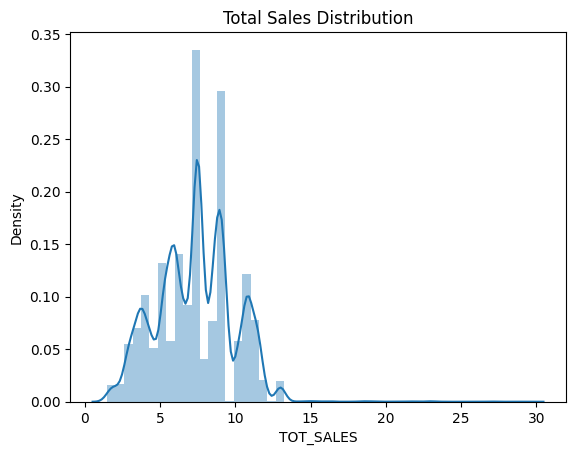

In [12]:
sns.distplot(transaction['TOT_SALES'])
plt.title("Total Sales Distribution")
plt.show()

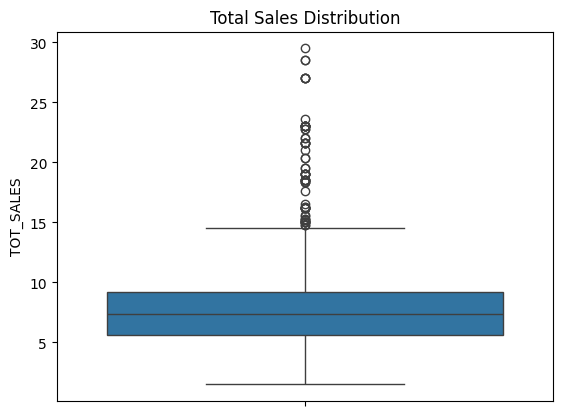

In [13]:
sns.boxplot(transaction['TOT_SALES'])
plt.title("Total Sales Distribution")
plt.show()

<ipython-input-14-f75ed626a49d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transaction['PROD_QTY'])


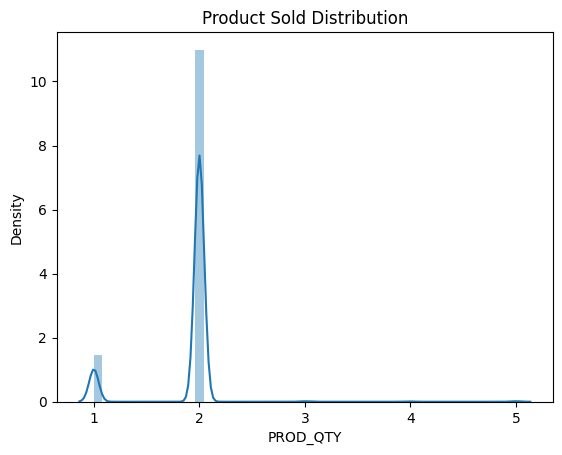

In [14]:
sns.distplot(transaction['PROD_QTY'])
plt.title("Product Sold Distribution")
plt.show()

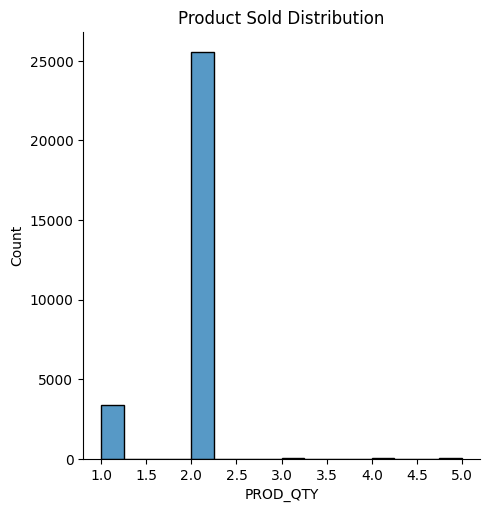

In [28]:
sns.displot(transaction['PROD_QTY'])
plt.title("Product Sold Distribution")
plt.show()

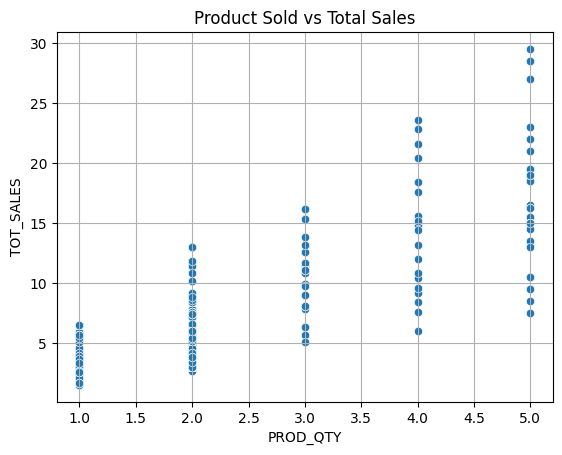

In [16]:
sns.scatterplot(x=transaction['PROD_QTY'],y=transaction['TOT_SALES'])
plt.title("Product Sold vs Total Sales")
plt.grid(True)
plt.show()

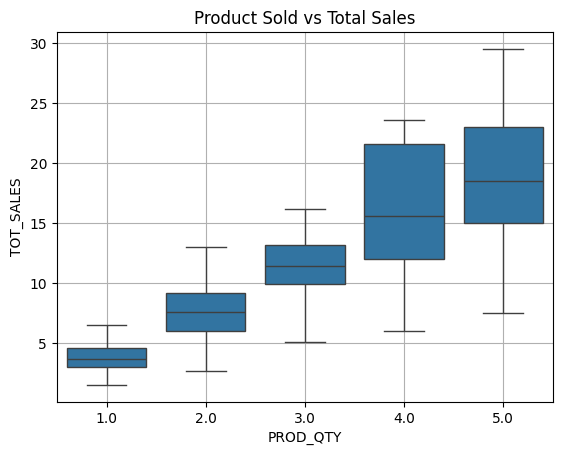

In [17]:
sns.boxplot(x=transaction['PROD_QTY'],y=transaction['TOT_SALES'])
plt.title("Product Sold vs Total Sales")
plt.grid(True)
plt.show()

**For Purchase Behaviour**

In [18]:
data1=pd.read_csv(r'/content/QVI_purchase_behaviour.csv')
purchase=pd.DataFrame(data1)
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [19]:
purchase.shape

(72637, 3)

In [20]:
purchase.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [21]:
purchase.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [22]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [23]:
for i in purchase.columns:
  print(i,':',purchase[i].unique())

LYLTY_CARD_NBR : [   1000    1002    1003 ... 2370751 2370961 2373711]
LIFESTAGE : ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']
PREMIUM_CUSTOMER : ['Premium' 'Mainstream' 'Budget']


In [24]:
for i in purchase.columns:
  print(purchase[i].value_counts())

LYLTY_CARD_NBR
1000       1
181211     1
181217     1
181216     1
181215     1
          ..
88126      1
88127      1
88128      1
88129      1
2373711    1
Name: count, Length: 72637, dtype: int64
LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64
PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64


In [25]:
purchase.describe(include='all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


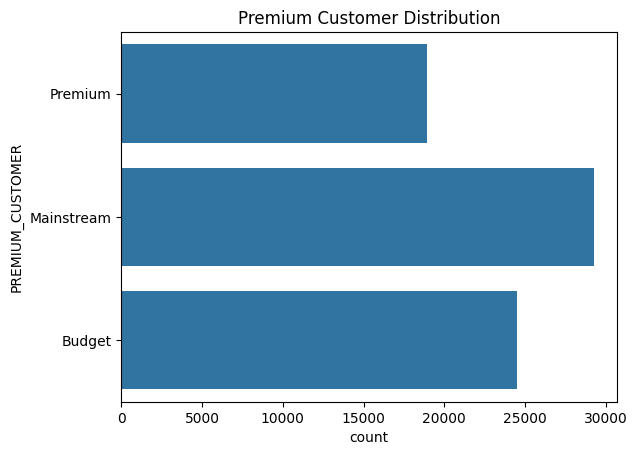

In [26]:
sns.countplot(purchase['PREMIUM_CUSTOMER'])
plt.title("Premium Customer Distribution")
plt.show()

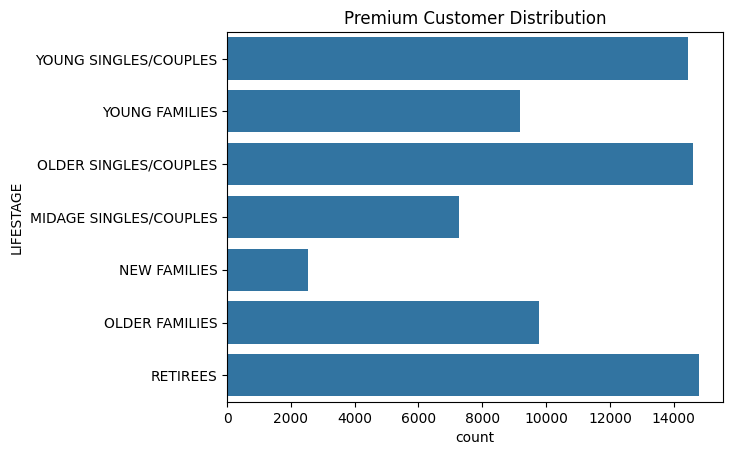

In [27]:
sns.countplot(purchase['LIFESTAGE'])
plt.title("Premium Customer Distribution")
plt.show()

**A dataset made from transaction and purchase datasets**

In [36]:
mod=pd.merge(transaction,purchase,on='LYLTY_CARD_NBR')
up=pd.DataFrame(mod)
up.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66.0,CCs Nacho Cheese 175g,3.0,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96.0,WW Original Stacked Chips 160g,2.0,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54.0,CCs Original 175g,1.0,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,MIDAGE SINGLES/COUPLES,Budget


In [37]:
new_data=up.to_excel('updated.xlsx',index=False)